In [2]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import sklearn
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 2)
sns.set(style="ticks", color_codes=True)
pd.set_option('display.max_columns', 60)
%config Completer.use_jedi = False
plt.rcParams['font.size'] = 24
pd.set_option('display.max_colwidth', -1)
from IPython.core.pylabtools import figsize


In [3]:
# Read in book data into a dataframe 
books=pd.read_csv('../code/books.csv',low_memory=False)

In [4]:
# See the column data types and non-missing values
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

In [5]:
print(books.shape)
print(list(books.columns))

(10000, 23)
['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [6]:
# Display top of dataframe
books.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m/2767052.jpg,https://images.gr-assets.com/books/1447303603s/2767052.jpg
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m/3.jpg,https://images.gr-assets.com/books/1474154022s/3.jpg
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m/41865.jpg,https://images.gr-assets.com/books/1361039443s/41865.jpg
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m/2657.jpg,https://images.gr-assets.com/books/1361975680s/2657.jpg
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m/4671.jpg,https://images.gr-assets.com/books/1490528560s/4671.jpg


In [7]:
#dropping some which will not be required for analysis
books.drop(['best_book_id','work_id','books_count','original_title','language_code','work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url'],axis=1,inplace=True)

In [8]:
#missing values in 'original_publication_year'
books.original_publication_year.unique()

array([ 2008.,  1997.,  2005.,  1960.,  1925.,  2012.,  1937.,  1951.,
        2000.,  1813.,  2003.,  2011.,  1949.,  1945.,  1947.,  2009.,
        1999.,  1954.,  2010.,  2002.,  1998.,  2007.,  1595.,  1988.,
        1993.,  1950.,  1996.,  2006.,  1868.,  1847.,  2001.,  1953.,
        1974.,  1979.,  1932.,  1884.,  1952.,  2015.,  1995.,  2004.,
        1969.,  1936.,  1985.,  1818.,  1977.,  1811.,  -720.,  1946.,
        1859.,  1990.,  1964.,  1989.,  1958.,  1973.,  1967.,  1911.,
        1891.,  1897.,  1963.,  1844.,  2013.,  1862.,  1961.,  1876.,
        1962.,  1955.,  1991.,  1600.,  1965.,  1939.,  1908.,  1850.,
        2014.,  1606.,  1860.,  1942.,  1978.,  1815.,  1877.,  1986.,
        1866.,  1922.,  1987.,  1851.,  1982.,  1843.,  1976.,  1994.,
        1915.,  1956.,    nan,  1980.,  1865.,  1817.,  1957.,  1926.,
        1943.,  1938.,  1966.,  1981.,  2016.,  1992.,  1984.,  1972.,
        1882.,  1895.,  1899.,  1983.,  -750.,  1900.,  1975.,  1971.,
      

In [9]:
#investigating the rows having negative value as original_publication_year
n_opy=books.loc[(books['original_publication_year']<=0)]
n_opy.shape

(31, 9)

In [10]:
#investigating the rows having value less than 1500 as original_publication_year
books.loc[(books['original_publication_year']>0) & (books['original_publication_year']<=1500)]

,book_id,goodreads_book_id,isbn,isbn13,authors,original_publication_year,title,average_rating,ratings_count
530,531,52357,393320979,9.780393e+12,"Unknown, Seamus Heaney",975.0,Beowulf,3.42,155903
645,646,2696,140424385,9.780140e+12,"Geoffrey Chaucer, Nevill Coghill",1390.0,The Canterbury Tales,3.48,148480
976,977,15645,812970063,9.780813e+12,"Dante Alighieri, Anthony M. Esolen",1320.0,Inferno (The Divine Comedy #1),3.99,87511
1166,1167,6656,679433139,9.780679e+12,"Dante Alighieri, Allen Mandelbaum, Eugenio Montale",1308.0,The Divine Comedy,4.06,74130
1909,1910,93101,812972147,9.780813e+12,"Anonymous, Richard Francis Burton, A.S. Byatt",800.0,The Arabian Nights,4.06,46656
1966,1967,30659,140449337,9.780140e+12,"Marcus Aurelius, Martin Hammond, Diskin Clay",180.0,Meditations,4.20,43876
2081,2082,646462,NaN,NaN,Anonymous,609.0,The Qur'an / القرآن الكريم,4.34,31765
2365,2366,1715,014044789X,9.780140e+12,"Ovid, David Raeburn, Denis Feeney",8.0,Metamorphoses,4.03,42590
3021,3022,3049,451528182,9.780452e+12,"Unknown, Burton Raffel, Neil D. Isaacs",1390.0,Sir Gawain and the Green Knight,3.68,36477
3171,3172,304079,62509594,9.780063e+12,"Jalaluddin Rumi, Coleman Barks",1273.0,The Essential Rumi,4.44,26575


In [11]:
#However, the negative value and 0 is invalid thereafer setting invalid years as NaN
books.loc[books.original_publication_year<= 0  ,'original_publication_year'] = np.NAN

#replacing NaNs with mean value of original_publication_year
books.original_publication_year.fillna(round(books.original_publication_year.mean()), inplace=True)

In [12]:
#resetting the dtype as int32
books.original_publication_year = books.original_publication_year.astype(np.int32)

In [13]:
print (sorted(books['original_publication_year'].unique()))
#Now it can be seen that yearOfPublication has all values as integers

[8, 119, 180, 397, 609, 800, 975, 1120, 1273, 1308, 1320, 1353, 1380, 1390, 1418, 1485, 1513, 1516, 1519, 1532, 1550, 1554, 1563, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1603, 1604, 1605, 1606, 1611, 1623, 1637, 1641, 1645, 1651, 1664, 1666, 1667, 1677, 1678, 1689, 1691, 1719, 1722, 1726, 1729, 1748, 1749, 1759, 1762, 1764, 1767, 1774, 1776, 1781, 1782, 1785, 1787, 1789, 1791, 1796, 1798, 1807, 1808, 1811, 1812, 1813, 1814, 1815, 1817, 1818, 1819, 1820, 1825, 1826, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1871, 1872, 1874, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 

In [14]:
books.head()

,book_id,goodreads_book_id,isbn,isbn13,authors,original_publication_year,title,average_rating,ratings_count
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,2008,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
1,2,3,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.44,4602479
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,2005,"Twilight (Twilight, #1)",3.57,3866839
3,4,2657,61120081,9.780061e+12,Harper Lee,1960,To Kill a Mockingbird,4.25,3198671
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,3.89,2683664


In [15]:
#exploring 'isbn13 column
books.loc[books.isbn13.isnull(),:]

,book_id,goodreads_book_id,isbn,isbn13,authors,original_publication_year,title,average_rating,ratings_count
105,106,9418327,NaN,NaN,Tina Fey,2011,Bossypants,3.94,506250
120,121,7604,NaN,NaN,"Vladimir Nabokov, Craig Raine",1955,Lolita,3.88,469836
161,162,49552,NaN,NaN,"Albert Camus, Matthew Ward",1942,The Stranger,3.96,420600
187,188,10664113,NaN,NaN,George R.R. Martin,2011,"A Dance with Dragons (A Song of Ice and Fire, #5)",4.31,365954
202,203,11505797,NaN,NaN,Jamie McGuire,2011,"Beautiful Disaster (Beautiful, #1)",4.15,418309
323,324,16068905,NaN,NaN,Rainbow Rowell,2013,Fangirl,4.12,340379
347,348,16143347,NaN,NaN,E. Lockhart,2014,We Were Liars,3.85,273442
412,413,7190,NaN,NaN,Alexandre Dumas,1844,The Three Musketeers,4.06,195274
463,464,1923820,NaN,NaN,Anonymous,1611,Holy Bible: King James Version,4.43,159457
565,566,25041504,NaN,NaN,Jojo Moyes,2015,"After You (Me Before You, #2)",3.70,99342


Since ISBN is a unique number we won't be able to fill NaN values either we will drop the 'isbn13' column or won't use it as a reference point. 

In [16]:
# Read in user data into a dataframe 
users=pd.read_csv('../code/users.csv',low_memory=False)

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


In [18]:
print(users.shape)
print(list(users.columns))

(912705, 2)
['user_id', 'book_id']


In [19]:
users.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [20]:
# Read in ratings data into a dataframe 
ratings=pd.read_csv('../code/ratings.csv',low_memory=False)

In [21]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


In [22]:
print(ratings.shape)
print(list(ratings.columns))

(5976479, 3)
['user_id', 'book_id', 'rating']


In [23]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [24]:
ratings.rating.unique()

array([5, 4, 3, 2, 1])

In [25]:
#ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset
ratings_new = ratings[ratings.book_id.isin(books.book_id)]

In [26]:
#ratings dataset will have n_users*n_books entries if every user rated every item, this shows that the dataset is very sparse
n_users = users.shape[0]
n_books = books.shape[0]
print (n_users * n_books)

9127050000


In [27]:
print ("number of users: " + str(n_users))
print ("number of books: " + str(n_books))

number of users: 912705
number of books: 10000


In [28]:
#Sparsity of dataset in %
sparsity=1.0-len(ratings_new)/float(n_users*n_books)
print ('The sparsity level of Book dataset is ' +  str(sparsity*100) + ' %')

The sparsity level of Book dataset is 99.93451905051468 %


In [29]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new.rating != 0]
ratings_implicit = ratings_new[ratings_new.rating == 0]

In [30]:
#checking shapes
print (ratings_new.shape)
print (ratings_explicit.shape)
print (ratings_implicit.shape)

(5976479, 3)
(5976479, 3)
(0, 3)


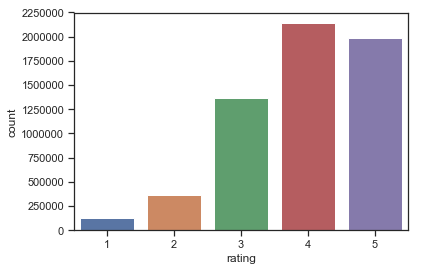

In [31]:
#plotting count of rating
sns.countplot(data=ratings_explicit , x='rating')
plt.show()

In [32]:
combine_book_rating = pd.merge(ratings, books, on='book_id')
columns = ['book_id', 'goodreads_book_id', 'isbn13', 'authors', 'original_publication_year', 'title', 'average_rating', 'ratings_count']
combine_book_rating.head()

,user_id,book_id,rating,goodreads_book_id,isbn,isbn13,authors,original_publication_year,title,average_rating,ratings_count
0,1,258,5,1232,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",2001,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",4.24,263685
1,11,258,3,1232,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",2001,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",4.24,263685
2,143,258,4,1232,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",2001,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",4.24,263685
3,242,258,5,1232,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",2001,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",4.24,263685
4,325,258,4,1232,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",2001,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",4.24,263685


In [33]:
if not combine_book_rating[combine_book_rating.duplicated(['user_id', 'title'])].empty:
    initial_rows = combine_book_rating.shape[0]

    print('Initial dataframe shape {0}'.format(combine_book_rating.shape))
    combine_book_rating = combine_book_rating.drop_duplicates(['user_id', 'title'])
    current_rows = combine_book_rating.shape[0]
    print('New dataframe shape {0}'.format(combine_book_rating.shape))
    print('Removed {0} rows'.format(initial_rows - current_rows))

Initial dataframe shape (5976479, 11)
New dataframe shape (5975161, 11)
Removed 1318 rows


In [34]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(combine_book_rating['average_rating'].describe())

count   5975161.000
mean    4.020      
std     0.250      
min     2.470      
25%     3.860      
50%     4.030      
75%     4.190      
max     4.820      
Name: average_rating, dtype: float64


In [35]:
print(combine_book_rating['average_rating'].quantile(np.arange(.9, 1, .01)))

0.900   4.330
0.910   4.340
0.920   4.350
0.930   4.370
0.940   4.390
0.950   4.420
0.960   4.440
0.970   4.460
0.980   4.520
0.990   4.540
Name: average_rating, dtype: float64


#### So about 1% of books have 4.54 ratings, 2% have 4.52 ratings. 

In [36]:
user_rating_pivot = combine_book_rating.pivot(index = 'title', columns = 'user_id', values = 'rating').fillna(0)
user_rating_matrix = csr_matrix(user_rating_pivot.values)

In [37]:
user_rating_pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,...,53395,53396,53397,53398,53399,53400,53401,53402,53403,53404,53405,53406,53407,53408,53409,53410,53411,53412,53413,53414,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Angels (Walsh Family, #3)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
#GIRLBOSS,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
"'Tis (Frank McCourt, #2)",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [38]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [46]:
query_index = np.random.choice(user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}: \n'.format(i, user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
print('Perfect! This books are definitely should be recommended one after another')  

Recommendations for Brain Rules: 12 Principles for Surviving and Thriving at Work, Home, and School:

1: A Whole New Mind: Why Right-Brainers Will Rule the Future, with distance of 0.8454638172875433: 

2: How We Decide, with distance of 0.8603980043240806: 

3: Drive: The Surprising Truth About What Motivates Us, with distance of 0.8629423447204392: 

4: Talent is Overrated: What Really Separates World-Class Performers from Everybody Else, with distance of 0.8651073696099224: 

5: The Upside of Irrationality: The Unexpected Benefits of Defying Logic at Work and at Home, with distance of 0.8722994549069018: 

Perfect! This books are definitely should be recommended one after another
